In [1]:
import os
from IPython.display import display

import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
MATRIX_SAVE = "../matrices/mimic_comparison/"

In [3]:
df = pd.read_pickle("../bert_embeddings.pkl")
df

ICD                                              descr  \
0     A01                     Typhoid and paratyphoid fevers   
1     A02                        Other salmonella infections   
2     A03                                        Shigellosis   
3     A04              Other bacterial intestinal infections   
4     A05  Other bacterial foodborne intoxications, not e...   
...   ...                                                ...   
1641  Z95  Presence of cardiac and vascular implants and ...   
1642  Z96              Presence of other functional implants   
1643  Z97                          Presence of other devices   
1644  Z98                          Other postsurgical states   
1645  Z99  Dependence on enabling machines and devices, n...   

                                            ICD + descr  \
0                    A01 Typhoid and paratyphoid fevers   
1                       A02 Other salmonella infections   
2                                       A03 Shigellosis   
3             A04 Other bacterial intestinal infections   
4     A05 Other bacterial foodborne intoxications, n...   
...                                                 ...   
1641  Z95 Presence of cardiac and vascular implants ...   
1642          Z96 Presence of other functional implants   
1643                      Z97 Presence of other devices   
1644                      Z98 Other postsurgical states   
1645  Z99 Dependence on enabling machines and device...   

                                              emb descr  \
0     [[tensor(-0.5629), tensor(-0.0199), tensor(-0....   
1     [[tensor(-0.3895), tensor(0.3233), tensor(-0.7...   
2     [[tensor(-0.6331), tensor(-0.0556), tensor(-0....   
3     [[tensor(-0.1067), tensor(0.3967), tensor(-0.7...   
4     [[tensor(-0.3324), tensor(0.2447), tensor(-0.5...   
...                                                 ...   
1641  [[tensor(-0.7181), tensor(-0.2812), tensor(-0....   
1642  [[tensor(-0.2822), tensor(0.0114), tensor(-0.3...   
1643  [[tensor(-0.2841), tensor(-0.0085), tensor(-0....   
1644  [[tensor(-0.0735), tensor(0.3265), tensor(-0.2...   
1645  [[tensor(-0.5364), tensor(0.1903), tensor(-0.4...   

                                        emb ICD + descr  
0     [[tensor(-0.7928), tensor(-0.2140), tensor(-0....  
1     [[tensor(-0.5858), tensor(0.2577), tensor(-0.8...  
2     [[tensor(-0.6012), tensor(-0.0272), tensor(-0....  
3     [[tensor(-0.2634), tensor(0.2395), tensor(-0.5...  
4     [[tensor(-0.3792), tensor(0.0802), tensor(-0.3...  
...                                                 ...  
1641  [[tensor(-0.8597), tensor(-0.5445), tensor(0.3...  
1642  [[tensor(-0.4940), tensor(-0.2059), tensor(0.0...  
1643  [[tensor(-0.4518), tensor(0.0315), tensor(-0.1...  
1644  [[tensor(-0.3363), tensor(0.4082), tensor(-0.1...  
1645  [[tensor(-0.4980), tensor(0.0278), tensor(-0.0...  

[1646 rows x 5 columns]

In [4]:
emb_np = df["emb descr"].apply(lambda x: x.numpy().reshape(-1))

In [5]:
similarity_scores = cosine_similarity(list(emb_np.values), list(emb_np.values))
similarity_scores = pd.DataFrame(data=similarity_scores, index=df["ICD"].values, columns=df["ICD"].values)
similarity_scores = similarity_scores.sort_index().sort_index(axis=1)
similarity_scores

A01       A02       A03       A04       A05       A06       A07  \
A01  1.000000  0.859263  0.665904  0.859328  0.823438  0.739128  0.830064   
A02  0.859263  1.000000  0.777299  0.973226  0.887758  0.864719  0.942049   
A03  0.665904  0.777299  1.000000  0.790424  0.789831  0.918534  0.804790   
A04  0.859328  0.973226  0.790424  1.000000  0.897982  0.869153  0.958348   
A05  0.823438  0.887758  0.789831  0.897982  1.000000  0.848450  0.882111   
..        ...       ...       ...       ...       ...       ...       ...   
Z95  0.779669  0.787446  0.655575  0.789148  0.778964  0.706729  0.809647   
Z96  0.764086  0.850063  0.756852  0.860772  0.832963  0.816212  0.868425   
Z97  0.739421  0.855469  0.779626  0.881020  0.858001  0.842469  0.869017   
Z98  0.708767  0.833812  0.833999  0.863123  0.860321  0.872246  0.880341   
Z99  0.748719  0.813255  0.777496  0.832422  0.881162  0.828844  0.831118   

          A08       A09       A15  ...       Z90       Z91       Z92  \
A01  0.882971  0.872794  0.820218  ...  0.805676  0.770825  0.720244   
A02  0.934150  0.913753  0.822012  ...  0.833975  0.822463  0.804401   
A03  0.738203  0.728572  0.668211  ...  0.775319  0.732290  0.759505   
A04  0.949521  0.909733  0.811130  ...  0.843866  0.828249  0.841633   
A05  0.885478  0.877474  0.823755  ...  0.887060  0.865728  0.805692   
..        ...       ...       ...  ...       ...       ...       ...   
Z95  0.841214  0.840462  0.831871  ...  0.831542  0.812264  0.785117   
Z96  0.868912  0.858428  0.789565  ...  0.876759  0.840421  0.855036   
Z97  0.857921  0.833847  0.768028  ...  0.872805  0.860544  0.861307   
Z98  0.802375  0.784803  0.704780  ...  0.826140  0.797962  0.857552   
Z99  0.832236  0.822454  0.777915  ...  0.909675  0.905688  0.840796   

          Z93       Z94       Z95       Z96       Z97       Z98       Z99  
A01  0.700874  0.752244  0.779669  0.764086  0.739421  0.708767  0.748719  
A02  0.820128  0.804286  0.787446  0.850063  0.855469  0.833812  0.813255  
A03  0.807920  0.732604  0.655575  0.756852  0.779626  0.833999  0.777496  
A04  0.840363  0.816984  0.789148  0.860772  0.881020  0.863123  0.832422  
A05  0.820886  0.816892  0.778964  0.832963  0.858001  0.860321  0.881162  
..        ...       ...       ...       ...       ...       ...       ...  
Z95  0.751214  0.863831  1.000000  0.915194  0.825616  0.706787  0.791059  
Z96  0.866423  0.886582  0.915194  1.000000  0.935555  0.837865  0.851133  
Z97  0.897258  0.848779  0.825616  0.935555  1.000000  0.869000  0.886361  
Z98  0.885827  0.794283  0.706787  0.837865  0.869000  1.000000  0.862982  
Z99  0.866983  0.834372  0.791059  0.851133  0.886361  0.862982  1.000000  

[1646 rows x 1646 columns]

In [ ]:
similarity_scores.to_csv(
    os.path.join(MATRIX_SAVE, "bert__similarity_scores.csv"),
    index=False,
)

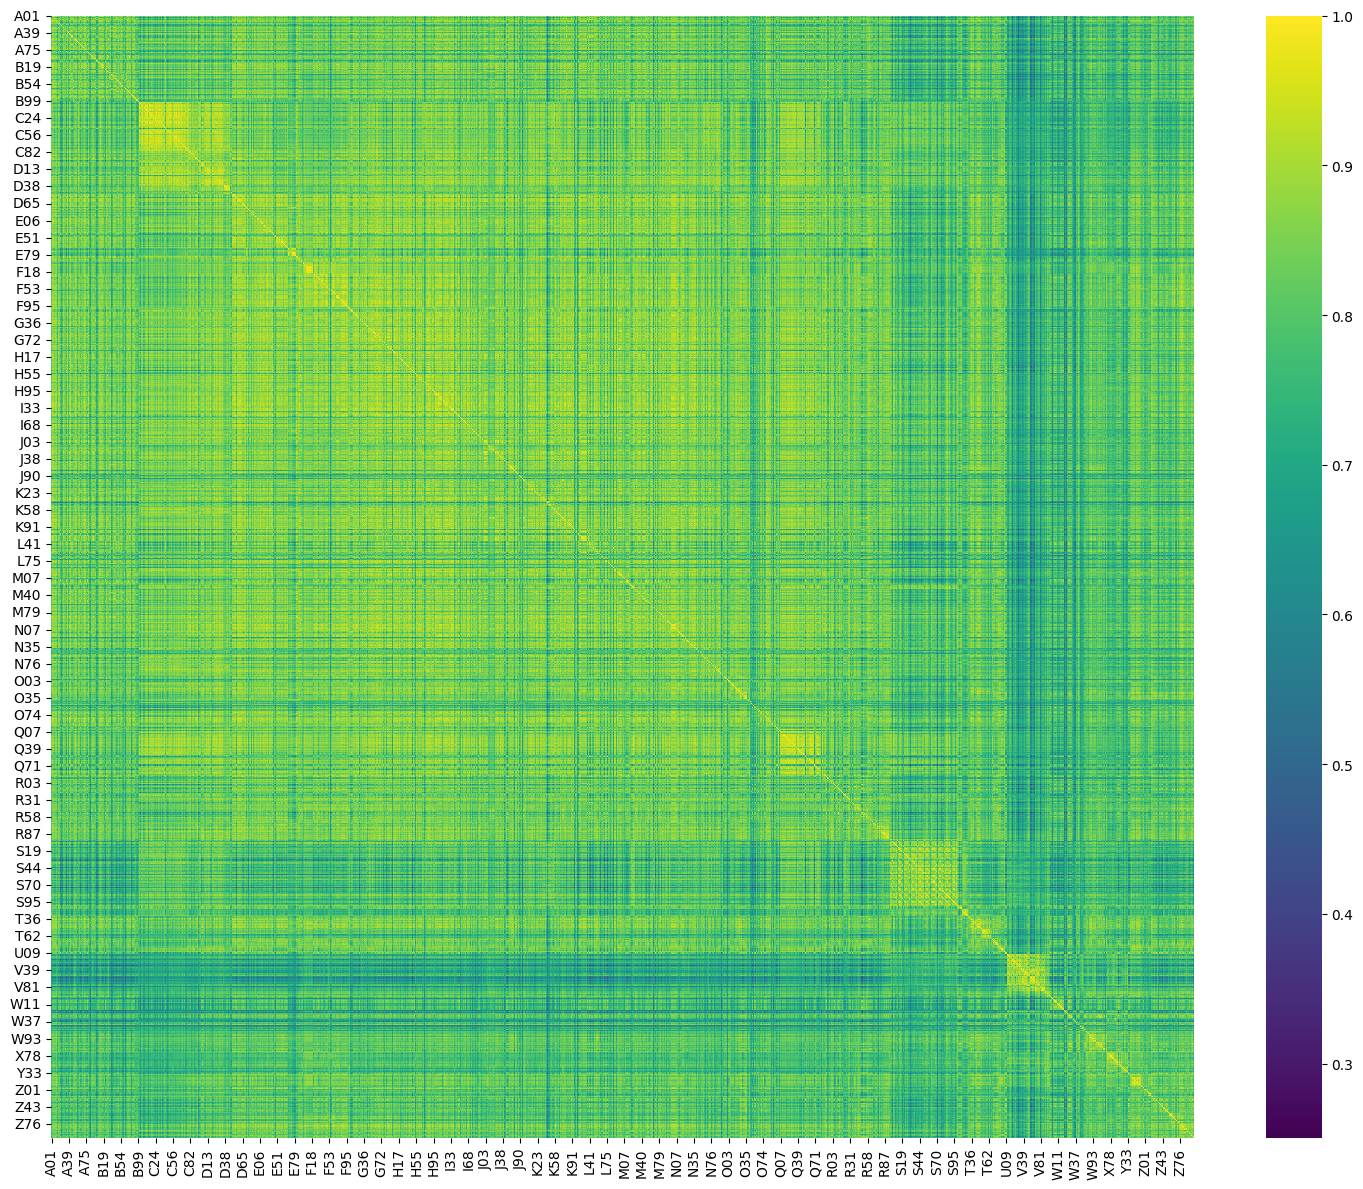

In [12]:
plt.figure(figsize=(15, 12))
sns.heatmap(similarity_scores, cmap ='viridis')
plt.tight_layout()
plt.show()